<a href="https://colab.research.google.com/github/jihyunjeongme/data-science/blob/master/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%82%AC%EC%9D%B4%EC%96%B8%EC%8A%A4_%ED%95%B8%EB%93%9C%EB%B6%81_NumPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 파이썬 데이터 사이언스 핸드북 
##### IPython, Jupyter, NumPy, Pandas, Matplotlib, Scikit-Learn 라이브러리를 활용한 데이터 과학과 머신러닝 (Ing)

<img src = "http://image.yes24.com/Goods/50330345/800x0" width="200" height="300"></img> 


- Github: https://github.com/jakevdp/PythonDataScienceHandbook
- Contactpoint: https://wikibook.co.kr/python-ds-handbook/


In [0]:
import random
L = [random.random() for i in range(100000)]
%time L.sort()

CPU times: user 32.2 ms, sys: 51 µs, total: 32.3 ms
Wall time: 32.8 ms


In [0]:
%%time

import random
L = [random.random() for i in range(100000)]
L.sort()

CPU times: user 49.5 ms, sys: 1.12 ms, total: 50.6 ms
Wall time: 51.2 ms


In [0]:
import numpy
numpy.__version__

'1.16.4'

In [0]:
import numpy as np

## 예제: 미국 대통령의 평균 신장은 얼마일까?


In [16]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [17]:
cd /content/gdrive/My Drive/Colab Notebooks/python_datascience_cookbook/ch_2_numpy

/content/gdrive/My Drive/Colab Notebooks/python_datascience_cookbook/ch_2_numpy


In [20]:

import numpy as np
import pandas as pd

data = pd.read_csv('president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights)
data.head()

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183


In [21]:
# 이 데이터 배열이 있으니 이제 다양한 요약 통계를 계산 할 수 있다.

print("Mean height: ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:", heights.min())
print("Maximum height:", heights.max())

Mean height:  179.73809523809524
Standard deviation: 6.931843442745892
Minimum height: 163
Maximum height: 193


In [22]:
print("25th percentile:", np.percentile(heights,25))
print("Medial:", np.median(heights))
print("75th percentile:", np.percentile(heights, 75))

25th percentile: 174.25
Medial: 182.0
75th percentile: 183.0


In [0]:
# 미국 대통령 신장의 중앙값은 182 cm

Text(0, 0.5, 'number')

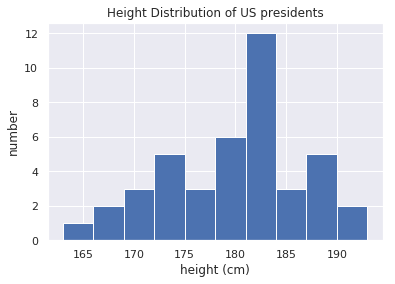

In [25]:
# Matplotlib의 도구를 이용해 시각적으로 표현하는게 유용할 때도 있다.

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

plt.hist(heights)
plt.title('Height Distribution of US presidents')
plt.xlabel('height (cm)')
plt.ylabel('number')

## 예제: 비온 날 세기
- 어느 도시의 일 년간 일일 강수량을 표시한 일련의 데이터

In [30]:
import numpy as np
import pandas as pd

# Pandas를 이용해 인치 단위의 강수량 데이터를 Numpy 배열로 추출

rainfall = pd.read_csv('Seattle2014.csv')['PRCP'].values
print(rainfall)
inches = rainfall / 254 # 1/10mm -> inches
inches.shape

[  0  41  15   0   0   3 122  97  58  43 213  15   0   0   0   0   0   0
   0   0   0   5   0   0   0   0   0  89 216   0  23  20   0   0   0   0
   0   0  51   5 183 170  46  18  94 117 264 145 152  10  30  28  25  61
 130   3   0   0   0   5 191 107 165 467  30   0 323  43 188   0   0   5
  69  81 277   3   0   5   0   0   0   0   0  41  36   3 221 140   0   0
   0   0  25   0  46   0   0  46   0   0   0   0   0   0   5 109 185   0
 137   0  51 142  89 124   0  33  69   0   0   0   0   0 333 160  51   0
   0 137  20   5   0   0   0   0   0   0   0   0   0   0   0   0  38   0
  56   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  18  64   0   5  36  13   0   8   3   0   0   0   0   0   0  18  23   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   3 193   0   0   0   0   0   0   0   0   0   5   0   0
   0   0   0   0   0   0   5 127 216   0  10   0   0   0   0   0   0   0
   0   0   0   0   0   0   0  84  13   0  30   0   

(365,)

In [0]:
# 배열에는 2014년 1월 1일부터 12월 31일까지 인치 단위의 일일 강수량을 나타내는 365개의 값이 들어 있다.

(array([245.,  14.,  13.,  17.,   8.,   6.,   5.,   6.,   4.,   3.,   7.,
          6.,   3.,   3.,   3.,   4.,   4.,   2.,   4.,   0.,   0.,   1.,
          1.,   1.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.04596457, 0.09192913, 0.1378937 , 0.18385827,
        0.22982283, 0.2757874 , 0.32175197, 0.36771654, 0.4136811 ,
        0.45964567, 0.50561024, 0.5515748 , 0.59753937, 0.64350394,
        0.6894685 , 0.73543307, 0.78139764, 0.8273622 , 0.87332677,
        0.91929134, 0.96525591, 1.01122047, 1.05718504, 1.10314961,
        1.14911417, 1.19507874, 1.24104331, 1.28700787, 1.33297244,
        1.37893701, 1.42490157, 1.47086614, 1.51683071, 1.56279528,
        1.60875984, 1.65472441, 1.70068898, 1.74665354, 1.79261811,
        1.83858268]),
 <a list of 40 Patch objects>)

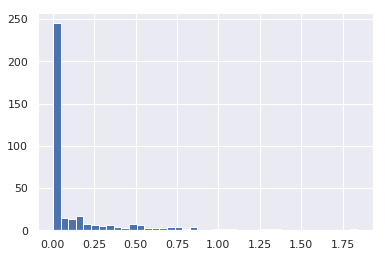

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set() # 플롯 형식 설정
plt.hist(inches, 40)

In [0]:
# 대다수 날에 강수량이 0에 가까운 모습을 볼 수 있다.

# 그렇지만 이 그래프는 '그해 비가 온날은 몇일까?','비 오는 날의 평균 강수량은 얼마인가'
# '0.5인치 이상 비가 온날은 며칠이나 될까?' 등 우리가 알고자 하는 정보를 전달하기에는 적합하지 않다.